<a href="https://colab.research.google.com/github/takaito1/EAS6305_F24/blob/main/week1/read_excel_from_BATS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EAS4305/6305 read excel from BATS
The goal of this homework is to experience getting oceanographic dataset from a ocean time series station. This script helps with the first 2 steps of the HW1.

In [1]:
! pip install gsw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 21.4 MB/s eta 0:00:00


In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import gsw
import pandas as pd

In [5]:
# Step 1 download data from BATS
df = pd.read_csv('https://datadocs.bco-dmo.org/file/m7zA3onuPG01JD/3918_v10_bats_ctd_2020-2024.csv')
df.head() # display the first 5 rows

,ID,ISO_DateTime_UTC_deployed,ISO_DateTime_UTC_recovered,Vessel,Latitude_deployed,Longitude_deployed,Latitude_recovered,Longitude_recovered,Cruise_type,Cruise_num,...,Oxygen,QF_Oxygen,BAC,QF_BAC,Flu,QF_Flu,PAR,QF_PAR,Decimal_Year_deployed,Decimal_Year_recovered
0,10367001,2020-01-21T12:09Z,2020-01-21T12:18Z,R/V Atlantic Explorer,32.3824,-64.6154,32.3834,-64.6156,BATS Core,10367,...,215.86,2,NaN,4,0.223,2,65.44,2,2020.056028,2020.056045
1,10367001,2020-01-21T12:09Z,2020-01-21T12:18Z,R/V Atlantic Explorer,32.3824,-64.6154,32.3834,-64.6156,BATS Core,10367,...,215.28,2,0.370,2,0.153,2,19.66,2,2020.056028,2020.056045
2,10367001,2020-01-21T12:09Z,2020-01-21T12:18Z,R/V Atlantic Explorer,32.3824,-64.6154,32.3834,-64.6156,BATS Core,10367,...,216.47,2,0.435,2,0.152,2,16.67,2,2020.056028,2020.056045
3,10367001,2020-01-21T12:09Z,2020-01-21T12:18Z,R/V Atlantic Explorer,32.3824,-64.6154,32.3834,-64.6156,BATS Core,10367,...,216.97,2,0.431,2,0.150,2,11.92,2,2020.056028,2020.056045
4,10367001,2020-01-21T12:09Z,2020-01-21T12:18Z,R/V Atlantic Explorer,32.3824,-64.6154,32.3834,-64.6156,BATS Core,10367,...,218.39,2,0.432,2,0.153,2,7.41,2,2020.056028,2020.056045


In [6]:
# define headers first (since the excel sheet doesn't have one)
headers = df.columns
print(headers)

Index(['ID', 'ISO_DateTime_UTC_deployed', 'ISO_DateTime_UTC_recovered',
       'Vessel', 'Latitude_deployed', 'Longitude_deployed',
       'Latitude_recovered', 'Longitude_recovered', 'Cruise_type',
       'Cruise_num', 'Cast', 'Depth', 'QF_Depth', 'Pressure', 'QF_Pressure',
       'Temperature', 'QF_Temperature', 'Salinity', 'QF_Salinity', 'Oxygen',
       'QF_Oxygen', 'BAC', 'QF_BAC', 'Flu', 'QF_Flu', 'PAR', 'QF_PAR',
       'Decimal_Year_deployed', 'Decimal_Year_recovered'],
      dtype='object')


In [7]:
# extract a specific parameter from specific cast / cruise
new_df = df.loc[(df.Cruise_num==10370)&(df.Cast==1)]
T = new_df['Temperature']
S = new_df['Salinity']
P = new_df['Pressure']
lon = new_df['Longitude_deployed']
lat = new_df['Latitude_deployed']

Text(0, 0.5, 'presssure, dbar')

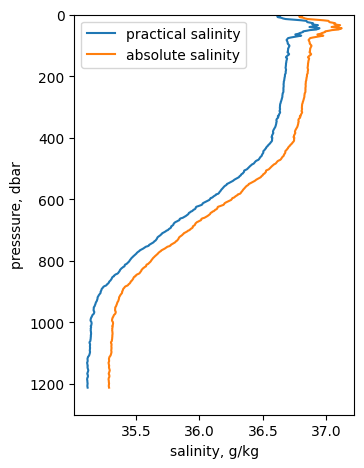

In [12]:
# now calculate absolute salinity
sa = gsw.SA_from_SP(S,P,lon,lat)
#
fig=plt.figure(figsize=(3.5,5))
ax=fig.add_subplot([.1,.1,.8,.8])
ax.plot(S,P,label='practical salinity')
ax.plot(sa,P,label='absolute salinity')
ax.set_ylim(1300,0)
ax.legend()
ax.set_xlabel('salinity, g/kg')
ax.set_ylabel('presssure, dbar')